In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('CCM_Annual_1985-2019.csv')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (2,17,33,37,952,953,955,956,957,962,976,977,982) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [48]:
IBM = df[df['conm'] == 'INTL BUSINESS MACHINES CORP']

In [49]:
IBM.head()

,GVKEY,LINKPRIM,LIID,LINKTYPE,LPERMNO,LPERMCO,LINKDT,LINKENDDT,datadate,fyear,...,priusa,sic,spcindcd,spcseccd,spcsrc,state,stko,weburl,dldte,ipodate
34093,6066,P,1,LC,12490,20990,19620131,E,19851231,1985.0,...,1,7370,190.0,940.0,A-,NY,0.0,www.ibm.com,NaN,NaN
34094,6066,P,1,LC,12490,20990,19620131,E,19861231,1986.0,...,1,7370,190.0,940.0,A-,NY,0.0,www.ibm.com,NaN,NaN
34095,6066,P,1,LC,12490,20990,19620131,E,19871231,1987.0,...,1,7370,190.0,940.0,A-,NY,0.0,www.ibm.com,NaN,NaN
34096,6066,P,1,LC,12490,20990,19620131,E,19881231,1988.0,...,1,7370,190.0,940.0,A-,NY,0.0,www.ibm.com,NaN,NaN
34097,6066,P,1,LC,12490,20990,19620131,E,19891231,1989.0,...,1,7370,190.0,940.0,A-,NY,0.0,www.ibm.com,NaN,NaN


In [ ]:
#DV -- Cash Dividends (Cash Flow)
#DVPSP_C -- Dividends per Share - Pay Date - Calendar
#DVPSP_F -- Dividends per Share - Pay Date - Fiscal
#DVPSX_C -- Dividends per Share - Ex-Date - Calendar
#DVPSX_F -- Dividends per Share - Ex-Date - Fiscal
#DVT -- Dividends - Total
#OPTDR -- Dividend Rate - Assumption (%)
#CSHI -- Common Shares Issued
#CSHO -- Common Shares Outstanding

In [88]:
IBM_div = IBM[['fyear','dv','dvpsp_c','dvpsp_f','dvpsx_c','dvpsx_f','dvt','optdr','cshi','csho']]

In [95]:
IBM_div.head()

,fyear,dv,dvpsp_c,dvpsp_f,dvpsx_c,dvpsx_f,dvt,optdr,cshi,csho
34093,1985.0,2703.0,4.40,4.40,4.40,4.40,2703.0,NaN,NaN,615.418
34094,1986.0,2698.0,4.40,4.40,4.40,4.40,2698.0,NaN,NaN,605.923
34095,1987.0,2654.0,4.40,4.40,4.40,4.40,2654.0,NaN,NaN,597.052
34096,1988.0,2609.0,4.40,4.40,4.40,4.40,2609.0,NaN,NaN,589.741
34097,1989.0,2752.0,4.73,4.73,4.73,4.73,2752.0,NaN,NaN,574.700


In [102]:
div = pd.read_csv('IBM_dividends.csv',parse_dates = [0])
div['year'] = div['Date'].apply(lambda x:x.year)
div_year = div.groupby('year').sum()

In [119]:
div_year.head()

,Dividends
year,
1985,1.10
1986,4.40
1987,4.40
1988,4.40
1989,4.73


In [161]:
result = pd.merge(div_year, IBM_div, how = 'left', left_on = 'year', right_on = 'fyear')
result.head()

,Dividends,fyear,dv,dvpsp_c,dvpsp_f,dvpsx_c,dvpsx_f,dvt,optdr,cshi,csho
0,1.10,1985.0,2703.0,4.40,4.40,4.40,4.40,2703.0,NaN,NaN,615.418
1,4.40,1986.0,2698.0,4.40,4.40,4.40,4.40,2698.0,NaN,NaN,605.923
2,4.40,1987.0,2654.0,4.40,4.40,4.40,4.40,2654.0,NaN,NaN,597.052
3,4.40,1988.0,2609.0,4.40,4.40,4.40,4.40,2609.0,NaN,NaN,589.741
4,4.73,1989.0,2752.0,4.73,4.73,4.73,4.73,2752.0,NaN,NaN,574.700


In [162]:
result['Dividends'] = result['Dividends'].apply(lambda x:float(x))
result['dvpsx_f'] = result['dvpsx_f'].apply(lambda x:float(x))

mask = []
for i in range(len(result)):
    if not abs(result['Dividends'][i] - result['dvpsx_f'][i]) < 1*10**(-8):
        mask.append(True)
    else:
        mask.append(False)
        
unmatched = result[mask]
unmatched

,Dividends,fyear,dv,dvpsp_c,dvpsp_f,dvpsx_c,dvpsx_f,dvt,optdr,cshi,csho
0,1.10,1985.0,2703.0,4.400,4.400,4.400,4.400,2703.0,NaN,NaN,615.418
12,1.15,1997.0,783.0,0.775,0.775,0.775,0.775,783.0,NaN,NaN,958.091
14,0.70,1999.0,879.0,0.470,0.470,0.470,0.470,879.0,NaN,1876.665,1784.216
30,6.30,2015.0,4897.0,5.000,5.000,5.000,5.000,4897.0,NaN,2221.223,965.729
31,6.90,2016.0,5256.0,5.500,5.500,5.500,5.500,5256.0,NaN,2225.117,945.867


In [155]:
f'CCM shows IBM pays divideds in {len(IBM_div)} years, and Yahoo Finance shows IBM pays divideds in {len(div_year)} years.'


'CCM shows IBM pays divideds in 34 years, and Yahoo Finance shows IBM pays divideds in 34 years.'

In [165]:
f'Value of year {len(unmatched)} years are matched'

'Value of year 5 years are matched'

Text(0.5, 1.0, 'CCM')

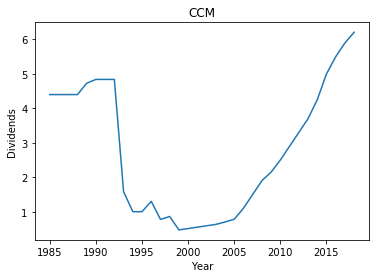

In [172]:
plt.plot(IBM_div['fyear'],IBM_div['dvpsx_f'])
plt.xlabel('Year')
plt.ylabel('Dividends')
plt.title('CCM')

Text(0.5, 1.0, 'Yahoo Finance')

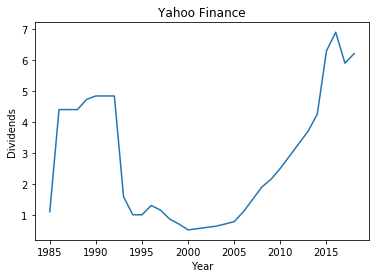

In [175]:
plt.plot(div_year.index,div_year['Dividends'])
plt.xlabel('Year')
plt.ylabel('Dividends')
plt.title('Yahoo Finance')